In [40]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_raw = pd.read_csv(mouse_file)
clinic_raw = pd.read_csv(clinical_file)

# Combine the data into a single dataset
mc_scrub = pd.merge(clinic_raw, mouse_raw, how="outer", on="Mouse ID")

# Display the data table for preview
mc_scrub.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [41]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint in DataFrame
drug_means = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Tumor Volume (mm3)':'mean'}))
drug_means = drug_means.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'})
drug_means.head()

Mean Tumor Volume (mm3)
Timepoint Drug                              
0         Capomulin                     45.0
          Ceftamin                      45.0
          Infubinol                     45.0
          Ketapril                      45.0
          Naftisol                      45.0

In [42]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint in DataFrame
drug_sems = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Tumor Volume (mm3)':'sem'}))
drug_sems = drug_sems.rename(columns={'Tumor Volume (mm3)': 'Standard Error Tumor Volume (mm3)'})
drug_sems.head()


Standard Error Tumor Volume (mm3)
Timepoint Drug                                        
0         Capomulin                                0.0
          Ceftamin                                 0.0
          Infubinol                                0.0
          Ketapril                                 0.0
          Naftisol                                 0.0

In [43]:
#unstack mean data to provide a clean DataFrame for plotting
mean_scrub = drug_means.unstack()
mean_scrub.columns = mean_scrub.columns.get_level_values(1)
mean_scrub.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [44]:
#unstack standard error data to provide a clean DataFrame for plotting
sem_scrub = drug_sems.unstack()
sem_scrub.columns = sem_scrub.columns.get_level_values(1)
sem_scrub.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


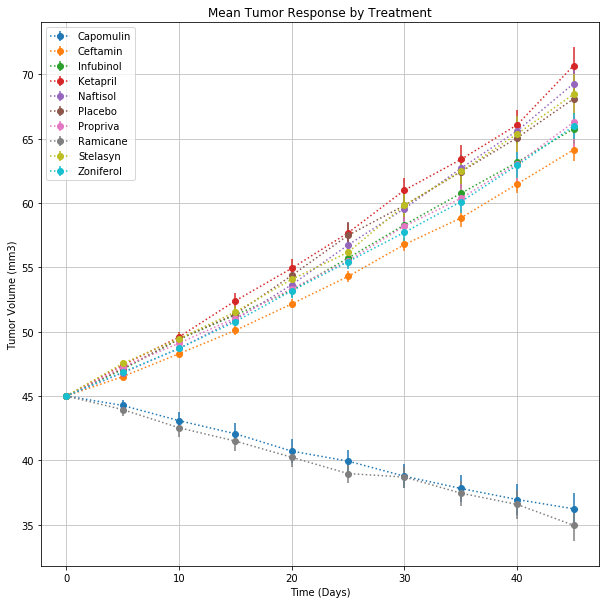

In [45]:
# use a for loop to iterate through the columns to generate a plot of the change in tumor size over time
plt.figure(figsize = (10, 10))
for column in mean_scrub:
    plt.errorbar(mean_scrub.index, mean_scrub[column], yerr=sem_scrub[column], fmt=":o")

plt.grid(color="0.75", linestyle="-")
plt.legend()
plt.title("Mean Tumor Response by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig('reponse_by_treatment.jpg')
plt.show()

## Metastatic Response to Treatment

In [46]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint in DataFrame
meta_means = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Metastatic Sites':'mean'}))
meta_means = meta_means.rename(columns={'Metastatic Sites': 'Mean # of Metastatic Sites'})
meta_means.head()


Mean # of Metastatic Sites
Timepoint Drug                                 
0         Capomulin                         0.0
          Ceftamin                          0.0
          Infubinol                         0.0
          Ketapril                          0.0
          Naftisol                          0.0

In [47]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint in Data Frame
meta_sems = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Metastatic Sites':'sem'}))
meta_sems = meta_sems.rename(columns={'Metastatic Sites': 'Standard Error of Metastatic Sites'})
meta_sems.head()


Standard Error of Metastatic Sites
Timepoint Drug                                         
0         Capomulin                                 0.0
          Ceftamin                                  0.0
          Infubinol                                 0.0
          Ketapril                                  0.0
          Naftisol                                  0.0

In [48]:
#unstack mean data to provide a clean DataFrame for plotting
meta_mscrub = meta_means.unstack()
meta_mscrub.columns = meta_mscrub.columns.get_level_values(1)
meta_mscrub.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [49]:
#unstack mean data to provide a clean DataFrame for plotting
meta_sscrub = meta_sems.unstack()
meta_sscrub.columns = meta_sscrub.columns.get_level_values(1)
meta_sscrub.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


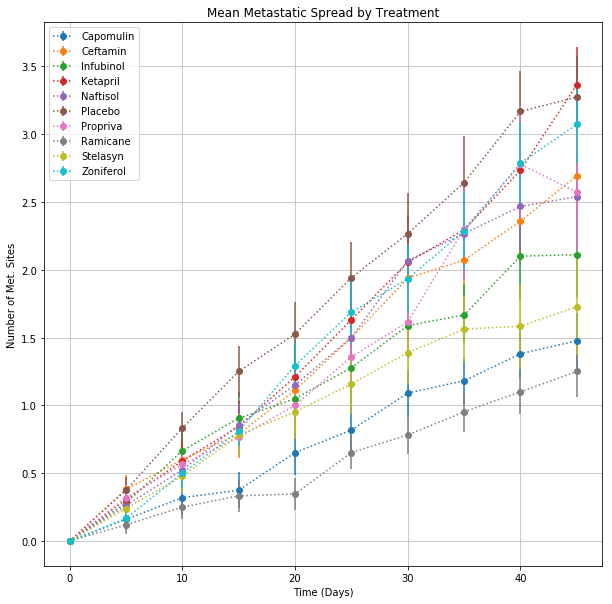

In [50]:
# use a for loop to iterate through the columns to generate a plot of the change in tumor size over time
plt.figure(figsize = (10, 10))
for column in meta_mscrub:
    plt.errorbar(meta_mscrub.index, meta_mscrub[column], yerr=meta_sscrub[column], fmt=":o")

plt.grid(color="0.75", linestyle="-")
plt.legend()
plt.title("Mean Metastatic Spread by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Met. Sites")

# Save the Figure
plt.savefig('meta_sites_by_treatment.jpg')
plt.show()

## Survival Rates

In [51]:
# Store the Count of Mice Grouped by Drug and Timepoint with unique counts of Mouse ID to determine survival rate
mouse_counts = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Mouse ID':'nunique'}))
mouse_counts.head()

Mouse ID
Timepoint Drug               
0         Capomulin        25
          Ceftamin         25
          Infubinol        25
          Ketapril         25
          Naftisol         25

In [52]:
# Minor Data Munging to Re-Format the Data Frames
mc_scrub = mouse_counts.unstack()
mc_scrub.columns = mc_scrub.columns.get_level_values(1)
mc_scrub.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


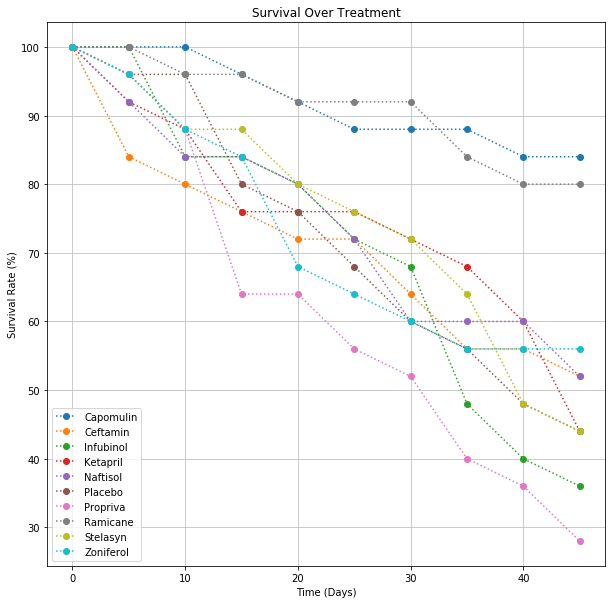

In [59]:
# Generate the Plot (Accounting for percentages) to visualize mouse survival rate over time
plt.figure(figsize = (10, 10))
for column in mc_scrub:
    plt.plot(mc_scrub.index, (mc_scrub[column]/25)*100, linestyle=":", marker="o")
plt.grid(color="0.75", linestyle="-")
plt.legend()
plt.title("Survival Over Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig('survival_rate_by_treatment.jpg')
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

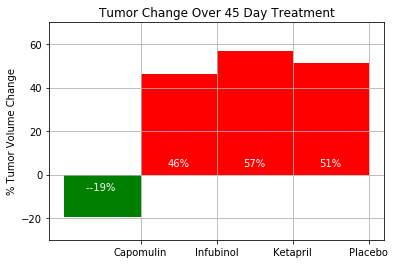